In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definieer wat waardes voor je k's
k1 = 100000000       # kon for E + S to ES
k2 = 100                # koff for ES to E + S
k3 = 100000000
k4 = 10
k5 = 0.001
k6 = 0
kcat = 1

# Definieer de concentraties op T=0 (in eerste instantie: voor inhibitie of substraat)
E0 = 10*10**-9
ES0 = 0
P0 = 0
EI0 = 0
EIi0 = 0  #(EI*)

#Definieer constanten
I = 0*10**-9
S0 = 400*10**-9
dt = 0.001 #Dit is hoe groot je simulatie tijdstappen zijn

tframe = 1 #save a frame every 60 s
tincub = 0 #incubate for 1800 s
tsub =60  # Run with substrate for 1800 s

In [ ]:
concentraties = np.array([E0, ES0, P0, EI0, EIi0], dtype=np.double) #matrix van concentraties

In [ ]:
# Voor toevoeging van S

S=0 # Geen S in je systeem

                        # [         E,       ES, P,     EI, EI*]
tijdevolutie0 = np.array([[-k3*I-k1*S,  k2+kcat, 0,     k4,   0],  #E
                          [      k1*S, -k2-kcat, 0,      0,   0],  #ES
                          [         0,     kcat, 0,      0,   0],  #P
                          [      k3*I,        0, 0, -k4-k5,  k6],  #EI
                          [         0,        0, 0,     k5, -k6]]) #EI*

#verandering in E   = [E]*(-k3*I-k1*S) + [ES]*(k2+kcat)  + [P]*(0) + [EI]*(k4)     + [EI*]*(0)
#verandering in ES  = [E]*(k1*S)       + [ES]*(-k2-kcat) + [P]*(0) + [EI]*(0)      + [EI*]*(0)
#verandering in P   = [E]*(0)          + [ES]*(kcat)     + [P]*(0) + [EI]*(0)      + [EI*]*(0)
#verandering in EI  = [E]*(k3*I)       + [ES]*(0)        + [P]*(0) + [EI]*(-k4-k5) + [EI*]*(k6)
#verandering in EI* = [E]*(0)          + [ES]*(0)        + [P]*(0) + [EI]*(k5)     + [EI*]*(-k6)

In [ ]:
# Maak een lijst van kopien van de concentraties
plot = [concentraties.copy()]

tijdconc = concentraties
t = 0
# Voor toevoging van S (tincub/dt stappen = 30min)
for i in range(int(tincub/dt)):
    t+= 1
    tijdconc += np.dot(tijdevolutie0*dt, tijdconc) # Doe 1 dt tijdstap
    if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

    
    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst
  
# Na toevoeging van S (tsub/dt stappen)
for i in range(int(tsub/dt)):
    t += 1
    S= S0-(tijdconc[2]+tijdconc[1]) #Subtract P and ES from S
    tijdevolutie1 = np.array([[-k3*I-k1*S, k2+kcat, 0, k4, 0],
                         [k1*S, -k2-kcat, 0, 0, 0],
                         [0, kcat, 0, 0, 0],
                         [k3*I, 0, 0, -k4-k5, k6],
                         [0, 0, 0, k5, -k6]])
    tijdconc += np.dot(tijdevolutie1*dt, tijdconc) #Doe 1 dt tijdstap
    if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

    
    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst


In [ ]:
# Splits de lijst van figuren in E, ES, P, EI en EI*
Eplot = [] 
ESplot = []
Pplot = []
EIplot = []
EIiplot = []
EItot = []
for frame in plot:
    Eplot.append(frame[0])
    ESplot.append(frame[1])
    Pplot.append(frame[2])
    EIplot.append(frame[3])
    EIiplot.append(frame[4])
    EItot.append(frame[3]+frame[4]) 

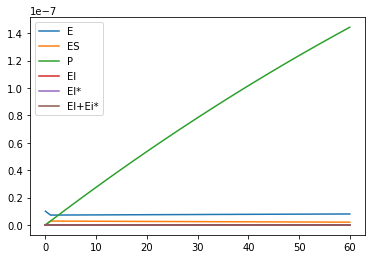

In [ ]:
# Plot de figuren
labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    plt.plot(y, label=labels[i])
plt.legend()

(0.0, 1e-08)

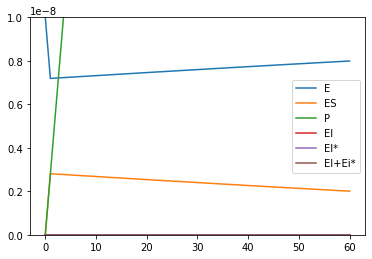

In [ ]:
# Plot de figuren
labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    plt.plot(y, label=labels[i])
plt.legend()
plt.ylim(0,E0) #zoom in tot E0

In [ ]:
print(Eplot)

[1e-08, 7.191602000920403e-09, 7.205901872102293e-09, 7.220185045974579e-09, 7.234451074916664e-09, 7.2486995118425615e-09, 7.262929910269382e-09, 7.277141824385967e-09, 7.2913348091215164e-09, 7.3055084202144204e-09, 7.31966221428103e-09, 7.333795748884566e-09, 7.347908582603948e-09, 7.362000275102627e-09, 7.376070387197388e-09, 7.390118480927096e-09, 7.404144119621284e-09, 7.418146867968729e-09, 7.432126292085785e-09, 7.446081959584665e-09, 7.460013439641401e-09, 7.473920303063714e-09, 7.48780212235858e-09, 7.501658471799534e-09, 7.51548892749377e-09, 7.529293067448805e-09, 7.543070471638842e-09, 7.556820722070972e-09, 7.570543402850706e-09, 7.584238100247221e-09, 7.597904402758216e-09, 7.61154190117433e-09, 7.625150188643037e-09, 7.638728860732007e-09, 7.652277515492028e-09, 7.665795753519323e-09, 7.679283178017422e-09, 7.692739394858142e-09, 7.706164012642447e-09, 7.719556642760228e-09, 7.732916899449593e-09, 7.74624439985556e-09, 7.759538764087978e-09, 7.772799615278706e-09, 7.786

In [ ]:
import pandas as pd

In [ ]:
dataframe = pd.DataFrame(data={'E':Eplot,  "EI":EIplot, "EIi":EIiplot, "ES":ESplot, "P":Pplot})

In [ ]:
print(dataframe.to_csv())

,E,EI,EIi,ES,P
0,1e-08,0.0,0.0,0.0,0.0
1,7.191602000920403e-09,0.0,0.0,2.8083979990795946e-09,2.795624848189219e-09
2,7.205901872102293e-09,0.0,0.0,2.794098127897701e-09,5.596878688836041e-09
3,7.220185045974579e-09,0.0,0.0,2.779814954025406e-09,8.383840961284984e-09
4,7.234451074916664e-09,0.0,0.0,2.7655489250833172e-09,1.115652858647381e-08
5,7.2486995118425615e-09,0.0,0.0,2.7513004881574144e-09,1.391495893269956e-08
6,7.262929910269382e-09,0.0,0.0,2.7370700897305746e-09,1.665914981504978e-08
7,7.277141824385967e-09,0.0,0.0,2.7228581756139898e-09,1.9389119494764998e-08
8,7.2913348091215164e-09,0.0,0.0,2.7086651908784408e-09,2.210488667853297e-08
9,7.3055084202144204e-09,0.0,0.0,2.6944915797855525e-09,2.480647051771366e-08
10,7.31966221428103e-09,0.0,0.0,2.6803377857189455e-09,2.749389060749593e-08
11,7.333795748884566e-09,0.0,0.0,2.666204251115407e-09,3.016716698598492e-08
12,7.347908582603948e-09,0.0,0.0,2.6520914173960245e-09,3.282632013322105e-08
13,7.362000275102627e-09,0.0,0.0,2